In [105]:
# Import Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [39]:
# Set files input path, and read in pandas. We use the recently updated dataset on 06/29/2020.
global_dataset=pd.read_csv('../data_set/Global/06-29-2020.csv')
us_dataset=pd.read_csv('../data_set/US/06-29-2020.csv')
population_dataset=pd.read_csv('../data_set/Global Population/population.csv')
lockdown_level=pd.read_csv('../data_set/Lockdown data/global_countries_lockdown.csv')
timeseries_confirmed_df=pd.read_csv('../data_set/Timeseries Confirmed/time_series_covid19_confirmed_global.csv')
timeseries_deaths_df=pd.read_csv('../data_set/Timeseries Deaths/time_series_covid19_deaths_global.csv')

In [3]:
# Display the dataset for US dataset to look for unnecessary values
us_dataset
# In this dataset, the Grand Princess and Diamond Princess will not be used, since they are cruise ships, 
# and not counted as the states.


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-06-30 04:34:02,32.3182,-86.9023,37175,929,18866.0,17380.0,1,758.180652,393293.0,2725.0,2.498991,84000001.0,USA,8021.173992,7.330195
1,Alaska,US,2020-06-30 04:34:02,61.3707,-152.4044,901,14,525.0,362.0,2,123.163989,108709.0,NaN,1.553829,84000002.0,USA,14860.193153,NaN
2,American Samoa,US,2020-06-30 04:34:02,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,696.0,NaN,NaN,16.0,ASM,1250.876152,NaN
3,Arizona,US,2020-06-30 04:34:02,33.7298,-111.4312,74545,1598,9179.0,63768.0,4,1024.150273,511423.0,4634.0,2.143672,84000004.0,USA,7026.279494,6.216379
4,Arkansas,US,2020-06-30 04:34:02,34.9697,-92.3731,20257,265,14066.0,5926.0,5,671.249690,302536.0,1380.0,1.308190,84000005.0,USA,10025.038074,6.812460
5,California,US,2020-06-30 04:34:02,36.1162,-119.6816,223646,5983,NaN,217663.0,6,566.017255,4061692.0,NaN,2.675210,84000006.0,USA,10279.583611,NaN
6,Colorado,US,2020-06-30 04:34:02,39.0598,-105.3111,32494,1681,4459.0,26354.0,8,564.255767,319565.0,5401.0,5.173263,84000008.0,USA,5549.221218,16.621530
7,Connecticut,US,2020-06-30 04:34:02,41.5978,-72.7554,46362,4320,8053.0,33989.0,9,1300.372172,444976.0,10268.0,9.317976,84000009.0,USA,12480.790467,22.147448
8,Delaware,US,2020-06-30 04:34:02,39.3185,-75.5071,11376,507,6665.0,4204.0,10,1168.250213,109931.0,NaN,4.456751,84000010.0,USA,11289.285700,NaN
9,Diamond Princess,US,2020-06-30 04:34:02,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN


In [4]:
# Get the indices of the rows that are not used
unused_rows=us_dataset.loc[(us_dataset['Province_State']=='Grand Princess')|(us_dataset['Province_State']=='Diamond Princess')]
unused_rows

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-06-30 04:34:02,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN
13,Grand Princess,US,2020-06-30 04:34:02,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999.0,USA,NaN,NaN


In [5]:
# Drop the 9th and 13th rows and some extra columns what would not be used, such as: 
# Country_Region,Last_Update,FIPS,People_Tested,People_Hospitalized,Morality_rate, and last 4 columns.
cleaned_us_dataset=us_dataset.drop(us_dataset.index[[9,13]])

# Drop unused columns:
cleaned_us_dataset=cleaned_us_dataset[['Province_State','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Incident_Rate']]
cleaned_us_dataset=cleaned_us_dataset.reset_index()

# Delete the old index column
del cleaned_us_dataset['index']

# Fill the NaN cells with 0
cleaned_us_dataset=cleaned_us_dataset.fillna(0)

# Rename the Long_ column, so the df will have cleaner look
cleaned_us_dataset=cleaned_us_dataset.rename(columns={
    'Long_':'Lng'
})

# Display the cleaned up dataset for US
cleaned_us_dataset.head()

,Province_State,Last_Update,Lat,Lng,Confirmed,Deaths,Recovered,Active,Incident_Rate
0,Alabama,2020-06-30 04:34:02,32.3182,-86.9023,37175,929,18866.0,17380.0,758.180652
1,Alaska,2020-06-30 04:34:02,61.3707,-152.4044,901,14,525.0,362.0,123.163989
2,American Samoa,2020-06-30 04:34:02,-14.2710,-170.1320,0,0,0.0,0.0,0.000000
3,Arizona,2020-06-30 04:34:02,33.7298,-111.4312,74545,1598,9179.0,63768.0,1024.150273
4,Arkansas,2020-06-30 04:34:02,34.9697,-92.3731,20257,265,14066.0,5926.0,671.249690


In [6]:
# Display the Global dataset, also the population dataset, 
global_dataset.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-30 04:33:48,34.223334,-82.461707,106,0,0,106,"Abbeville, South Carolina, US",432.176785,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-30 04:33:48,30.295065,-92.414197,850,37,0,813,"Acadia, Louisiana, US",1369.973406,4.352941
2,51001.0,Accomack,Virginia,US,2020-06-30 04:33:48,37.767072,-75.632346,1039,14,0,1025,"Accomack, Virginia, US",3215.125634,1.347449
3,16001.0,Ada,Idaho,US,2020-06-30 04:33:48,43.452658,-116.241552,2040,23,0,2017,"Ada, Idaho, US",423.599474,1.127451
4,19001.0,Adair,Iowa,US,2020-06-30 04:33:48,41.330756,-94.471059,15,0,0,15,"Adair, Iowa, US",209.731544,0.000000


In [7]:
# Display the population_dataset
population_dataset.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola,32866268.0


In [8]:
# Find the US dataframe within the global_dataset, and count them to confirm the correct data.
# us_grouped=global_dataset.loc[global_dataset['Country_Region']=='US']
# len(us_grouped) = 3114
# So we found that there are 3114 rows for the US within the global_dataset, 
# so the rest would be 3785-3114 = 671 row entries for the global.
# global_dataset=global_dataset[global_dataset['Country_Region']!='US']
# len(global_dataset) = 671

# Drop some of the unecessary columns
global_dataset=global_dataset[['Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Incidence_Rate']]

# Rename some columns so the dataframe will look cleaner
cleaned_global_dataset=global_dataset.rename(columns={
    'Long_':'Lng',
    'Incidence_Rate':'Incident_Rate'
})
# Display the final global_dataset to look for null cells
cleaned_global_dataset

# Fill the Province_State NaN with unidentified as marker for map, since they have geocoordinate values
cleaned_global_dataset['Province_State']=cleaned_global_dataset['Province_State'].fillna(value='Unidentified')
# Fill other NaN (if any) with 0
cleaned_global_dataset=cleaned_global_dataset.fillna(0)
# Reset the index for df
cleaned_global_dataset.reset_index()
cleaned_global_dataset=cleaned_global_dataset.reset_index()
del cleaned_global_dataset['index']
# Display the df
cleaned_global_dataset


,Province_State,Country_Region,Last_Update,Lat,Lng,Confirmed,Deaths,Recovered,Active,Incident_Rate
0,South Carolina,US,2020-06-30 04:33:48,34.223334,-82.461707,106,0,0,106,432.176785
1,Louisiana,US,2020-06-30 04:33:48,30.295065,-92.414197,850,37,0,813,1369.973406
2,Virginia,US,2020-06-30 04:33:48,37.767072,-75.632346,1039,14,0,1025,3215.125634
3,Idaho,US,2020-06-30 04:33:48,43.452658,-116.241552,2040,23,0,2017,423.599474
4,Iowa,US,2020-06-30 04:33:48,41.330756,-94.471059,15,0,0,15,209.731544
...,...,...,...,...,...,...,...,...,...,...
3780,Unidentified,West Bank and Gaza,2020-06-30 04:33:48,31.952200,35.233200,2185,5,447,1733,42.831245
3781,Unidentified,Western Sahara,2020-06-30 04:33:48,24.215500,-12.885800,10,1,8,1,1.674116
3782,Unidentified,Yemen,2020-06-30 04:33:48,15.552727,48.516388,1128,304,432,392,3.781939
3783,Unidentified,Zambia,2020-06-30 04:33:48,-13.133897,27.849332,1568,22,1311,235,8.529176


In [9]:
# Work with the global population_dataset to get the population for the us and the rest.
population_df=pd.DataFrame(columns=['Country_Region','Population'])
# Get the list of country names in the global dataset.
# global_list_name=cleaned_global_dataset['Country_Region'].unique()
# grouped_df=population_dataset.groupby(['Country_Region'])
# sum1=(grouped_df['Population'].sum())/2
    
# population_df['Population']=sum1        
# population_df.reset_index()
# population_df.loc[population_df['Country_Region']=='US']
# Using iterrows function to lookup the country and its population
for i,row in population_dataset.iterrows():
    if row['Country_Region'] == row['Combined_Key']:
        population_df=population_df.append({'Country_Region':row['Country_Region'],'Population':row['Population']},ignore_index=True)
        
# Display the population_df
reindexed_population_df=population_df.set_index('Country_Region')
reindexed_population_df

,Population
Country_Region,
Afghanistan,3.892834e+07
Albania,2.877800e+06
Algeria,4.385104e+07
Andorra,7.726500e+04
Angola,3.286627e+07
...,...
Zimbabwe,1.486293e+07
Australia,2.545970e+07
Canada,3.785570e+07


In [10]:
grouped_global=cleaned_global_dataset.groupby(['Country_Region'])
mortality_rate=grouped_global['Deaths'].sum().reset_index()
mortality_rate.sort_values(by='Country_Region')
mortality_rate=mortality_rate.set_index('Country_Region')
# mortality_rate.loc[mortality_rate['Country_Region']=='US']
# sorted_value=mortality_rate.sort_values(by='Country_Region')
# population_df['Mortality']=sorted_value['Deaths']
# # # population_df.loc[:,'Mortality'=mortality_rate]
# joined_df=population_df.join(mortality_rate,how='left',on='Country_Region')

mortality_rate

,Deaths
Country_Region,
Afghanistan,733
Albania,58
Algeria,905
Andorra,52
Angola,11
...,...
West Bank and Gaza,5
Western Sahara,1
Yemen,304


In [11]:
# Read in the lockdown level dataset, then extract the one with national and regional lockdown
lockdown_df=pd.DataFrame(lockdown_level)
# Drop first and last row, as they do not have any information
dropped_lockdown_df=lockdown_df.drop(lockdown_df.index[[0,-1]])
dropped_lockdown_df=dropped_lockdown_df.reset_index()
del dropped_lockdown_df['index']
# Rename all the columns
dropped_lockdown_df.rename(columns={
    "vteCOVID-19 pandemic lockdowns":'Countries_Territories',
    'vteCOVID-19 pandemic lockdowns.1':'Place',
    'vteCOVID-19 pandemic lockdowns.2':'Start_date',
    'vteCOVID-19 pandemic lockdowns.3':'End_date',
    'vteCOVID-19 pandemic lockdowns.4':'Level'
    
},inplace=True)
# Set index for the dropped_lockdown_df
reindexed_df=dropped_lockdown_df.set_index('Countries_Territories')

# Display the reindexed_df
reindexed_df.head(50)

,Place,Start_date,End_date,Level
Countries_Territories,,,,
Albania,Albania,2020-03-13[3],2020-06-01[4],National
Algeria,Algeria,2020-03-23[5],2020-05-14[6],City
Argentina,Argentina,2020-03-19[7],2020-06-28[8],National
Armenia,Armenia,2020-03-24[9],2020-05-04[10],National
Australia,Australia,2020-03-23[11],NaN,National
Austria,Austria,2020-03-16[12],2020-04-13[13],National
Azerbaijan,Azerbaijan,2020-03-31[14],2020-04-20[14],National
Bangladesh,Bangladesh,2020-03-26[15],2020-05-16[16],National
Barbados,Barbados,2020-03-28[17],2020-05-03[17],National


In [12]:
# We will pick out some example countries that have large population, and did lockdown on national and regional level:
# Australia, Germany, Brazil, Russia, USA,France,Italy
example_countries_df=reindexed_df.loc[['Australia','United States','Russia','Germany','Brazil','France','Italy','Liberia','Israel'],['Place','Start_date','End_date','Level']]

# Find the national and regional lockdown aountries
national_lockdown_df=example_countries_df.loc[example_countries_df['Level']=='National']
regional_lockdown_df=example_countries_df.loc[example_countries_df['Level']!= 'National']
# Fill the NaN cells, as some of them does not contain any information.
# national_lockdown_df['End_date']=national_lockdown_df['End_date'].fillna(value='0')
# regional_lockdown_df['End_date']=regional_lockdown_df['End_date'].fillna(value='0')
# Display the national_lockdown_df
national_lockdown_df.fillna(0)

,Place,Start_date,End_date,Level
Countries_Territories,,,,
Australia,Australia,2020-03-23[11],0,National
Russia,Rest of the country[i],2020-03-28[124],2020-04-30[124],National
Germany,Germany,2020-03-23[a][46],2020-04-20[47]to 2020-05-10[48],National
France,France,2020-03-17[42],2020-05-11[43],National
Italy,Italy,2020-03-09[b][66],2020-05-18[67],National


In [13]:
# Display the regional_lockdown_df
regional_lockdown_df.fillna(0)


,Place,Start_date,End_date,Level
Countries_Territories,,,,
United States,California,2020-03-19[152],0,State
United States,Clark County in Nevada,2020-03-20,0,County
United States,Connecticut,2020-03-23[153],2020-04-22[154],State
United States,Illinois,2020-03-21[155],2020-05-30[156],State
United States,Kansas City in Kansas,2020-03-24[157],2020-04-19[158],City
United States,Massachusetts,2020-03-24[159],2020-05-04[159],State
United States,Michigan,2020-03-24[160],2020-04-13[154],State
United States,New York,2020-03-22[161],2020-06-13[162],State
United States,Oregon,2020-03-24[163],0,State


In [14]:
# We notice that Russia did lockdown on 2 different level, the Moscow capital is on metropolitan area, the rest of Russia was on
# national level.

# Using the mortality_rate df to display the deaths count for these example countries
countries_death_count=mortality_rate.loc[['Australia','US','Russia','Germany','Brazil','France','Italy','Liberia','Israel'],['Deaths']]
countries_death_count



,Deaths
Country_Region,
Australia,104
US,126140
Russia,9152
Germany,8976
Brazil,58314
France,29816
Italy,34744
Liberia,36
Israel,319


In [15]:
# Get the population for exampled countries
example_countries_population=reindexed_population_df.loc[['Australia','US','Russia','Germany','Brazil','France','Italy','Liberia','Israel'],['Population']]
example_countries_population

,Population
Country_Region,
Australia,25459700.0
US,329466283.0
Russia,145934460.0
Germany,83783945.0
Brazil,212559409.0
France,65273512.0
Italy,60461828.0
Liberia,5057677.0
Israel,8655541.0


In [16]:
# Merge the example_countries_population with countries_death_count to calculate the mortality rate
population_deaths_df=example_countries_population.merge(countries_death_count,how='outer',on='Country_Region')
# We want to calculate for the mortality rate over 100000 people per population for each countries
mortality_rates=(population_deaths_df['Deaths']/population_deaths_df['Population'])*100000
population_deaths_df['Mortality_rate']=mortality_rates
population_deaths_df

,Population,Deaths,Mortality_rate
Country_Region,,,
Australia,25459700.0,104,0.408489
US,329466283.0,126140,38.286164
Russia,145934460.0,9152,6.271308
Germany,83783945.0,8976,10.713270
Brazil,212559409.0,58314,27.434213
France,65273512.0,29816,45.678559
Italy,60461828.0,34744,57.464356
Liberia,5057677.0,36,0.711789
Israel,8655541.0,319,3.685500


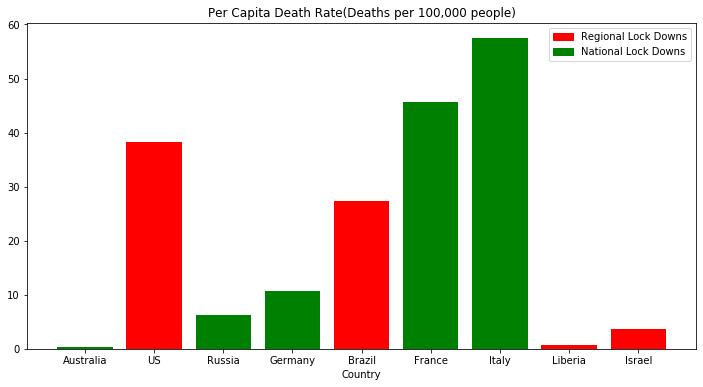

In [17]:
mortality_rate_bar_df = pd.DataFrame(population_deaths_df['Mortality_rate']).reset_index()
x_axis_mort_rt = mortality_rate_bar_df['Country_Region']
y_axis_mort_rt = mortality_rate_bar_df['Mortality_rate']
plt.figure(figsize=(12,6))
plt.bar(x_axis_mort_rt,y_axis_mort_rt, color=['green', 'red', 'green', 'green', 'red', 'green', 'green', 'red', 'red'])
region_lock_bar = mpatches.Patch(color='red', label='Regional Lock Downs')
national_lock_bar = mpatches.Patch(color='Green', label='National Lock Downs')                               
plt.legend(handles=[region_lock_bar, national_lock_bar])
plt.xlabel("Country")
plt.title("Per Capita Death Rate(Deaths per 100,000 people)")
plt.show()


In [31]:
#Tracking daily cases per country. 
# get the timeseries file and use it to create a new dataframe for each example country
# Do this for both deaths and confirmed cases
# Combine the two dataframes and create a line chart showing the number of cases and deaths and an annotation showing
# when the lockdown went into effect
#

Text(3/30/20, 5000, 'Regional Lockdowns Begin')

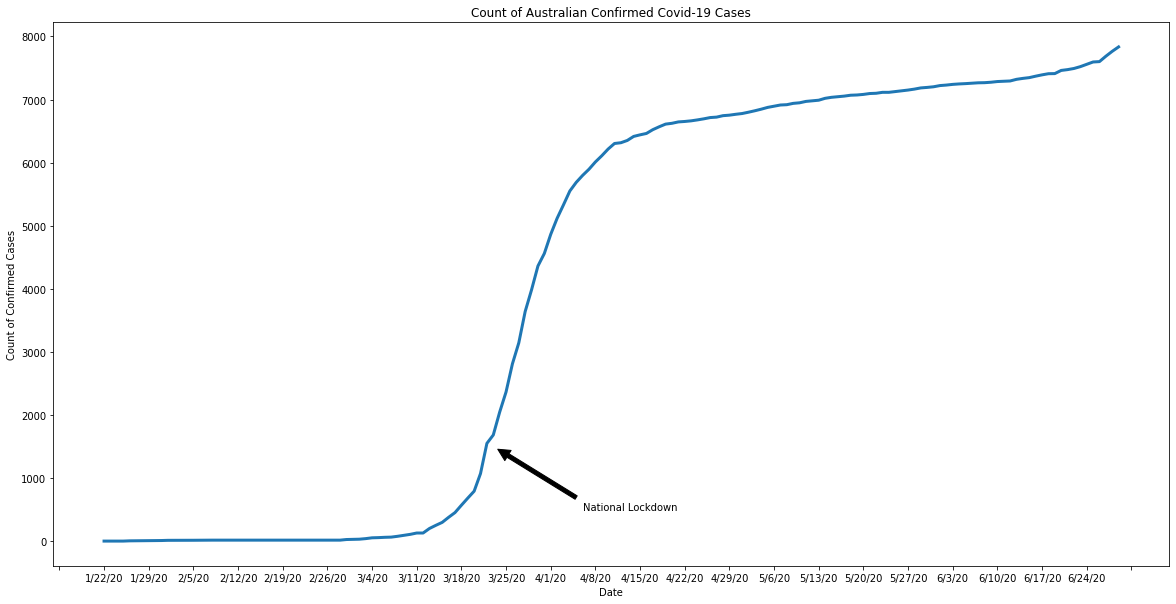

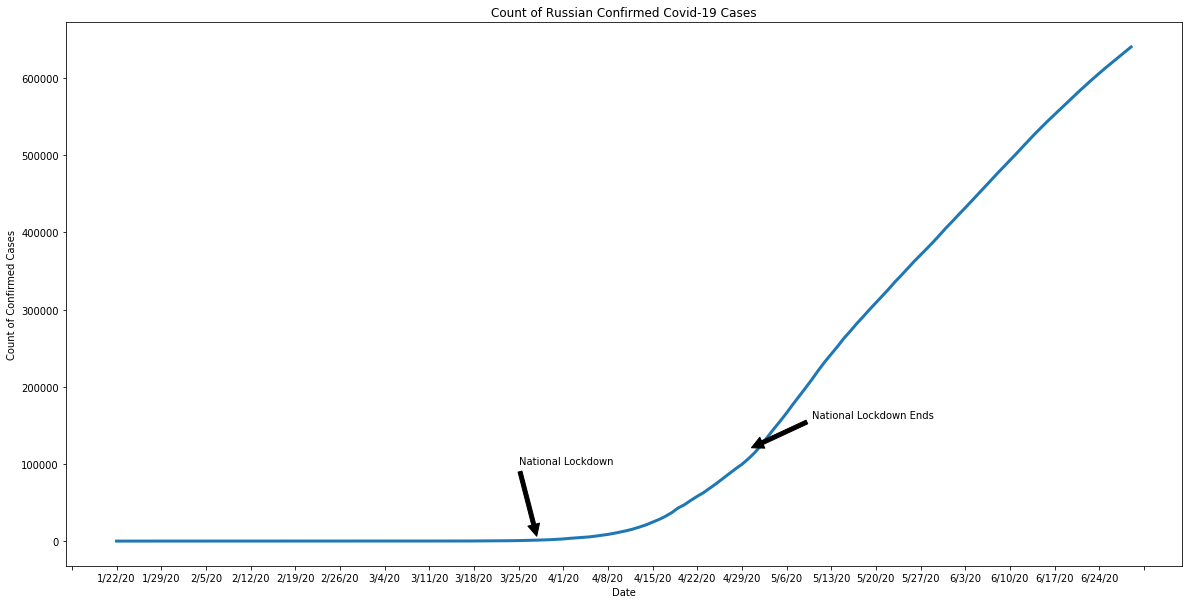

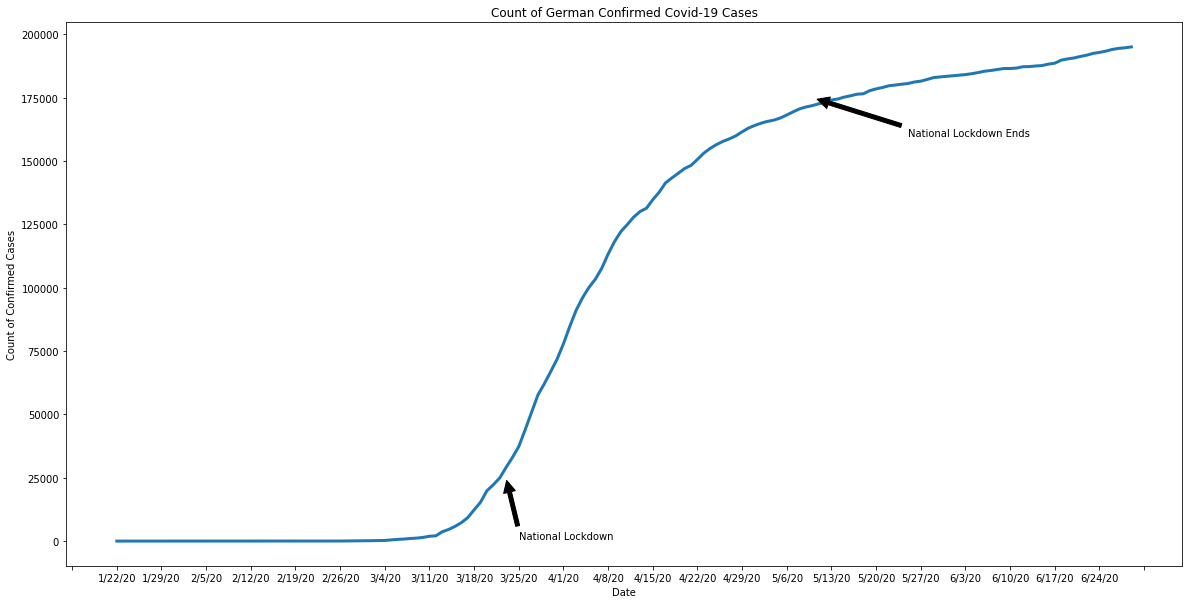

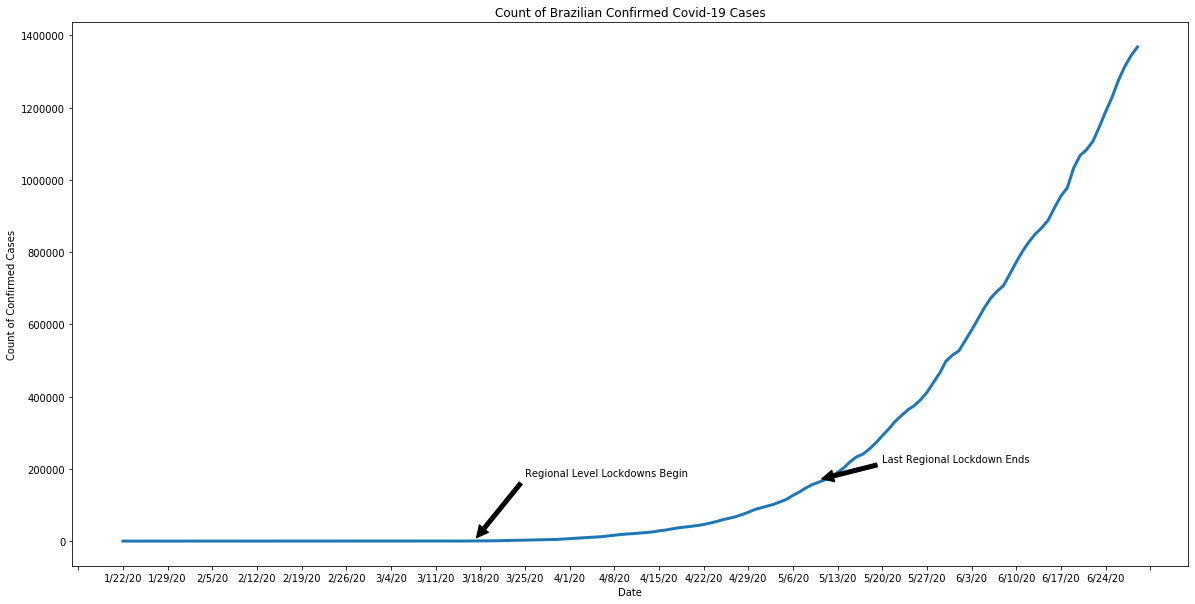

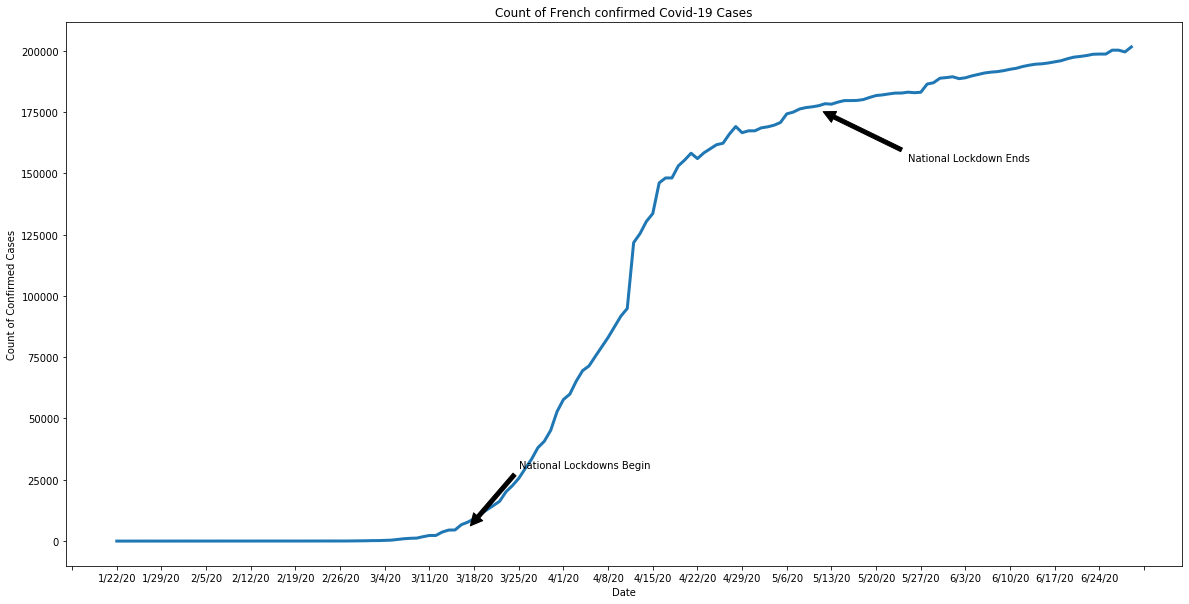

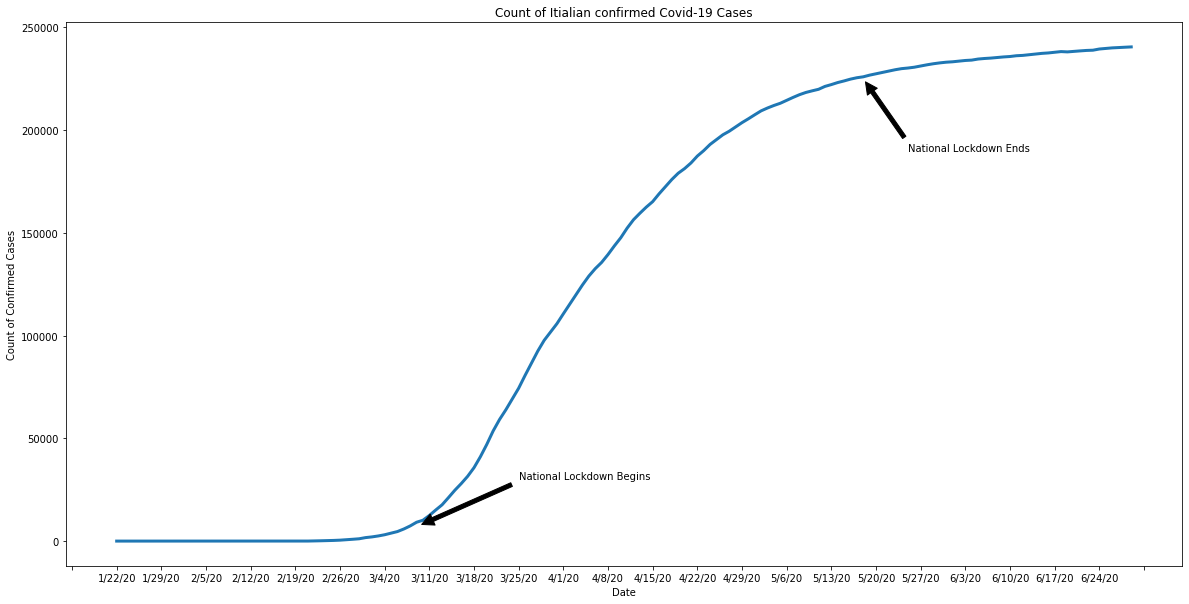

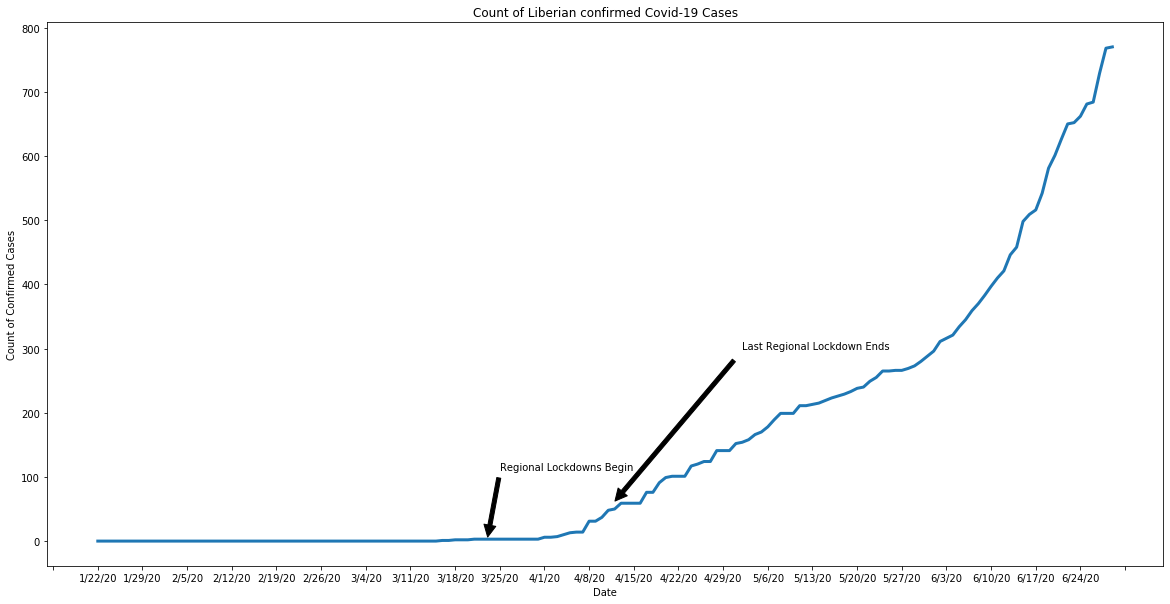

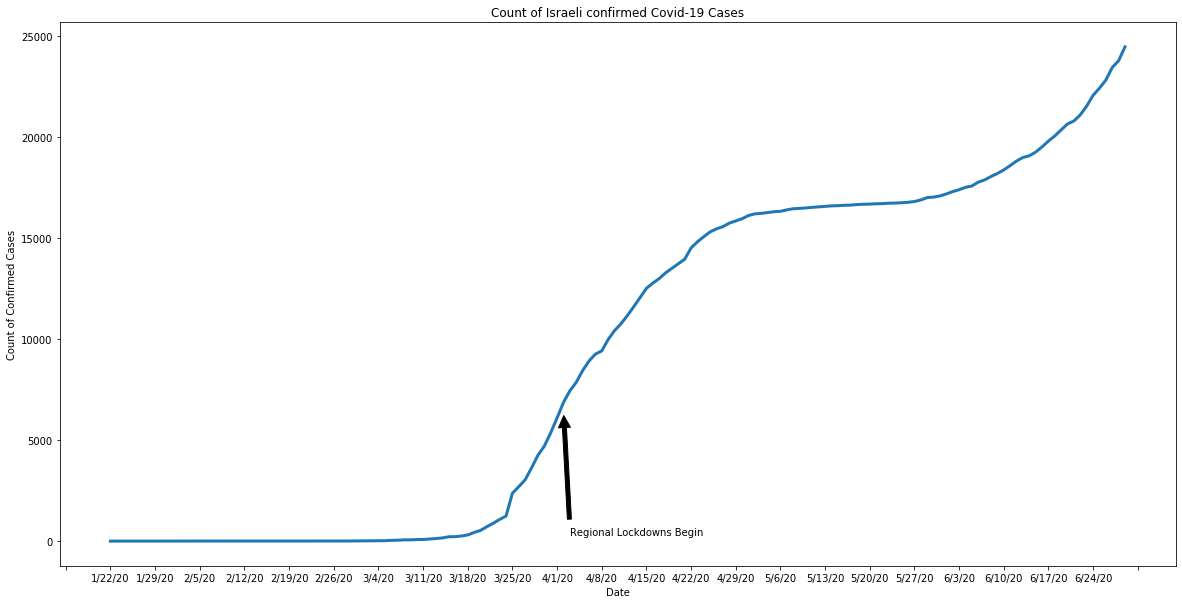

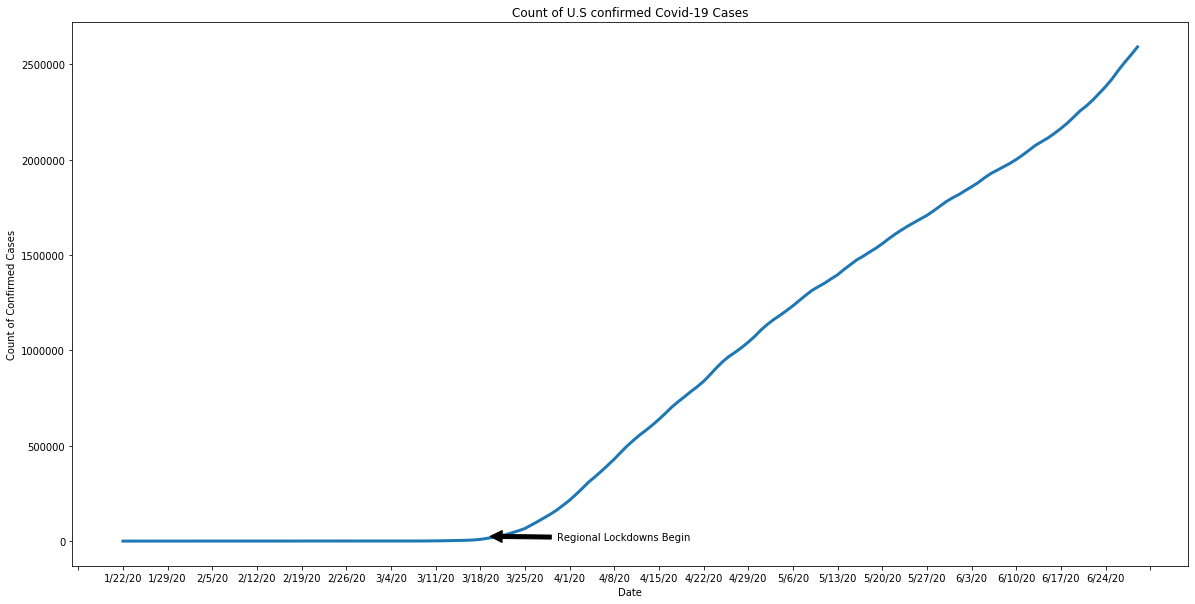

In [213]:
#The graphs below will take a look at whether the selected countries were able to or not able to successfully "flatten the curve for infections"

#Build out a seperate datafram for each of our example countries: Australia','Russia','Germany','Brazil','France','Italy','Liberia','Israel

#Create a dataframe that drops off everything but the confirmed case count and date so we can sum it up across all tracked 
#provinces and bucket it under the country level. This will give us a view into the curve

#AUSTRALIA
australia_confirmed_df=timeseries_confirmed_df.loc[timeseries_confirmed_df['Country/Region']=='Australia']
australia_confirmed_daily_sums = australia_confirmed_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
australia_confirmed_daily_sums_df =  pd.DataFrame(australia_confirmed_daily_sums)
australia_confirmed_daily_sums_df_reindex = australia_confirmed_daily_sums_df.reset_index()
australia_confirmed_daily_sums_df_reindex.columns = ['Date', 'Count']
#australia_confirmed_daily_sums_df_reindex.head(50)

  
#Plot out our confirmed cases.  Rinse and repeat for each example country
plt.figure(figsize=(20,10))
ax=plt.axes()
x_axis_australia_confirmed = australia_confirmed_daily_sums_df_reindex['Date']
y_axis_australia_confirmed = australia_confirmed_daily_sums_df_reindex['Count']
plt.title('Count of Australian Confirmed Covid-19 Cases')
plt.plot(x_axis_australia_confirmed, y_axis_australia_confirmed, linewidth=3)
plt.xlabel('Date')
plt.ylabel('Count of Confirmed Cases')
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.annotate('National Lockdown', xy=('3/23/20', 1500), xytext=('4/6/20', 500), arrowprops=dict(facecolor='black', shrink=0.05))

#RUSSIA

russia_confirmed_df=timeseries_confirmed_df.loc[timeseries_confirmed_df['Country/Region']=='Russia']
russia_confirmed_daily_sums = russia_confirmed_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
russia_confirmed_daily_sums_df =  pd.DataFrame(russia_confirmed_daily_sums)
russia_confirmed_daily_sums_df_reindex = russia_confirmed_daily_sums_df.reset_index()
russia_confirmed_daily_sums_df_reindex.columns = ['Date', 'Count']
#russia_confirmed_daily_sums_df_reindex.head(50)

  
#Plot out our confirmed cases.  Rinse and repeat for each example country
plt.figure(figsize=(20,10))
ax1=plt.axes()
x_axis_russia_confirmed = russia_confirmed_daily_sums_df_reindex['Date']
y_axis_russia_confirmed = russia_confirmed_daily_sums_df_reindex['Count']
plt.title('Count of Russian Confirmed Covid-19 Cases')
plt.plot(x_axis_russia_confirmed, y_axis_russia_confirmed, linewidth=3)
plt.xlabel('Date')
plt.ylabel('Count of Confirmed Cases')
ax1.xaxis.set_major_locator(MultipleLocator(7))
ax1.annotate('National Lockdown', xy=('3/28/20', 1500), xytext=('3/25/20', 100000), arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate('National Lockdown Ends', xy=('4/30/20', 119000), xytext=('5/10/20', 160000), arrowprops=dict(facecolor='black', shrink=0.05))


#GERMANY

germany_confirmed_df=timeseries_confirmed_df.loc[timeseries_confirmed_df['Country/Region']=='Germany']
germany_confirmed_daily_sums = germany_confirmed_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
germany_confirmed_daily_sums_df =  pd.DataFrame(germany_confirmed_daily_sums)
germany_confirmed_daily_sums_df_reindex = germany_confirmed_daily_sums_df.reset_index()
germany_confirmed_daily_sums_df_reindex.columns = ['Date', 'Count']
#germany_confirmed_daily_sums_df_reindex.head(50)

  
#Plot out our confirmed cases.  Rinse and repeat for each example country
plt.figure(figsize=(20,10))
ax2=plt.axes()
x_axis_germany_confirmed = germany_confirmed_daily_sums_df_reindex['Date']
y_axis_germany_confirmed = germany_confirmed_daily_sums_df_reindex['Count']
plt.title('Count of German Confirmed Covid-19 Cases')
plt.plot(x_axis_germany_confirmed, y_axis_germany_confirmed, linewidth=3)
plt.xlabel('Date')
plt.ylabel('Count of Confirmed Cases')
ax2.xaxis.set_major_locator(MultipleLocator(7))
ax2.annotate('National Lockdown', xy=('3/23/20', 25000), xytext=('3/25/20', 1000), arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate('National Lockdown Ends', xy=('5/10/20', 175000), xytext=('5/25/20', 160000), arrowprops=dict(facecolor='black', shrink=0.05))



#BRAZIL

brazil_confirmed_df=timeseries_confirmed_df.loc[timeseries_confirmed_df['Country/Region']=='Brazil']
brazil_confirmed_daily_sums = brazil_confirmed_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
brazil_confirmed_daily_sums_df =  pd.DataFrame(brazil_confirmed_daily_sums)
brazil_confirmed_daily_sums_df_reindex = brazil_confirmed_daily_sums_df.reset_index()
brazil_confirmed_daily_sums_df_reindex.columns = ['Date', 'Count']
#brazil_confirmed_daily_sums_df_reindex.head(50)

  
#Plot out our confirmed cases.  Rinse and repeat for each example country
plt.figure(figsize=(20,10))
ax3=plt.axes()
x_axis_brazil_confirmed = brazil_confirmed_daily_sums_df_reindex['Date']
y_axis_brazil_confirmed = brazil_confirmed_daily_sums_df_reindex['Count']
plt.title('Count of Brazilian Confirmed Covid-19 Cases')
plt.plot(x_axis_brazil_confirmed, y_axis_brazil_confirmed, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Confirmed Cases')
ax3.xaxis.set_major_locator(MultipleLocator(7))
ax3.annotate('Regional Level Lockdowns Begin', xy=('3/17/20', 200), xytext=('3/25/20', 180000), arrowprops=dict(facecolor='black', shrink=0.05))
ax3.annotate('Last Regional Lockdown Ends', xy=('5/10/20', 170000), xytext=('5/20/20', 220000), arrowprops=dict(facecolor='black', shrink=0.05))


#FRANCE

france_confirmed_df=timeseries_confirmed_df.loc[timeseries_confirmed_df['Country/Region']=='France']
france_confirmed_daily_sums = france_confirmed_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
france_confirmed_daily_sums_df =  pd.DataFrame(france_confirmed_daily_sums)
france_confirmed_daily_sums_df_reindex = france_confirmed_daily_sums_df.reset_index()
france_confirmed_daily_sums_df_reindex.columns = ['Date', 'Count']
#france_confirmed_daily_sums_df_reindex.head(50)

  
#Plot out our confirmed cases.  Rinse and repeat for each example country
plt.figure(figsize=(20,10))
ax4=plt.axes()
x_axis_france_confirmed = france_confirmed_daily_sums_df_reindex['Date']
y_axis_france_confirmed = france_confirmed_daily_sums_df_reindex['Count']
plt.title('Count of French confirmed Covid-19 Cases')
plt.plot(x_axis_france_confirmed, y_axis_france_confirmed, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Confirmed Cases')
ax4.xaxis.set_major_locator(MultipleLocator(7))
ax4.annotate('National Lockdowns Begin', xy=('3/17/20', 5000), xytext=('3/25/20', 30000), arrowprops=dict(facecolor='black', shrink=0.05))
ax4.annotate('National Lockdown Ends', xy=('5/11/20', 176000), xytext=('5/25/20', 155000), arrowprops=dict(facecolor='black', shrink=0.05))


#Italy

italy_confirmed_df=timeseries_confirmed_df.loc[timeseries_confirmed_df['Country/Region']=='Italy']
italy_confirmed_daily_sums = italy_confirmed_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
italy_confirmed_daily_sums_df =  pd.DataFrame(italy_confirmed_daily_sums)
italy_confirmed_daily_sums_df_reindex = italy_confirmed_daily_sums_df.reset_index()
italy_confirmed_daily_sums_df_reindex.columns = ['Date', 'Count']
#italy_confirmed_daily_sums_df_reindex.head(50)

  
#Plot out our confirmed cases.  Rinse and repeat for each example country
plt.figure(figsize=(20,10))
ax5=plt.axes()
x_axis_italy_confirmed = italy_confirmed_daily_sums_df_reindex['Date']
y_axis_italy_confirmed = italy_confirmed_daily_sums_df_reindex['Count']
plt.title('Count of Itialian confirmed Covid-19 Cases')
plt.plot(x_axis_italy_confirmed, y_axis_italy_confirmed, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Confirmed Cases')
ax5.xaxis.set_major_locator(MultipleLocator(7))
ax5.annotate('National Lockdown Begins', xy=('3/9/20', 7000), xytext=('3/25/20', 30000), arrowprops=dict(facecolor='black', shrink=0.05))
ax5.annotate('National Lockdown Ends', xy=('5/18/20', 225000), xytext=('5/25/20', 190000), arrowprops=dict(facecolor='black', shrink=0.05))

#Liberia

liberia_confirmed_df=timeseries_confirmed_df.loc[timeseries_confirmed_df['Country/Region']=='Liberia']
liberia_confirmed_daily_sums = liberia_confirmed_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
liberia_confirmed_daily_sums_df =  pd.DataFrame(liberia_confirmed_daily_sums)
liberia_confirmed_daily_sums_df_reindex = liberia_confirmed_daily_sums_df.reset_index()
liberia_confirmed_daily_sums_df_reindex.columns = ['Date', 'Count']
#liberia_confirmed_daily_sums_df_reindex.head(50)

  
#Plot out our confirmed cases.  Rinse and repeat for each example country
plt.figure(figsize=(20,10))
ax6=plt.axes()
x_axis_liberia_confirmed = liberia_confirmed_daily_sums_df_reindex['Date']
y_axis_liberia_confirmed = liberia_confirmed_daily_sums_df_reindex['Count']
plt.title('Count of Liberian confirmed Covid-19 Cases')
plt.plot(x_axis_liberia_confirmed, y_axis_liberia_confirmed, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Confirmed Cases')
ax6.xaxis.set_major_locator(MultipleLocator(7))
ax6.annotate('Regional Lockdowns Begin', xy=('3/23/20', 1), xytext=('3/25/20', 110), arrowprops=dict(facecolor='black', shrink=0.05))
ax6.annotate('Last Regional Lockdown Ends', xy=('4/11/20', 50), xytext=('5/2/20', 300), arrowprops=dict(facecolor='black', shrink=0.05))


#ISRAEL


israel_confirmed_df=timeseries_confirmed_df.loc[timeseries_confirmed_df['Country/Region']=='Israel']
israel_confirmed_daily_sums = israel_confirmed_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
israel_confirmed_daily_sums_df =  pd.DataFrame(israel_confirmed_daily_sums)
israel_confirmed_daily_sums_df_reindex = israel_confirmed_daily_sums_df.reset_index()
israel_confirmed_daily_sums_df_reindex.columns = ['Date', 'Count']
#israel_confirmed_daily_sums_df_reindex.head(50)

  
#Plot out our confirmed cases.  Rinse and repeat for each example country
plt.figure(figsize=(20,10))
ax7=plt.axes()
x_axis_israel_confirmed = israel_confirmed_daily_sums_df_reindex['Date']
y_axis_israel_confirmed = israel_confirmed_daily_sums_df_reindex['Count']
plt.title('Count of Israeli confirmed Covid-19 Cases')
plt.plot(x_axis_israel_confirmed, y_axis_israel_confirmed, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Confirmed Cases')
ax7.xaxis.set_major_locator(MultipleLocator(7))
ax7.annotate('Regional Lockdowns Begin', xy=('4/2/20', 6500), xytext=('4/3/20', 300), arrowprops=dict(facecolor='black', shrink=0.05))


#United States


us_confirmed_df=timeseries_confirmed_df.loc[timeseries_confirmed_df['Country/Region']=='US']
us_confirmed_daily_sums = us_confirmed_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
us_confirmed_daily_sums_df =  pd.DataFrame(us_confirmed_daily_sums)
us_confirmed_daily_sums_df_reindex = us_confirmed_daily_sums_df.reset_index()
us_confirmed_daily_sums_df_reindex.columns = ['Date', 'Count']
#us_confirmed_daily_sums_df_reindex.head(50)

  
#Plot out our confirmed cases.  Rinse and repeat for each example country
plt.figure(figsize=(20,10))
ax8=plt.axes()
x_axis_us_confirmed = us_confirmed_daily_sums_df_reindex['Date']
y_axis_us_confirmed = us_confirmed_daily_sums_df_reindex['Count']
plt.title('Count of U.S confirmed Covid-19 Cases')
plt.plot(x_axis_us_confirmed, y_axis_us_confirmed, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Confirmed Cases')
ax8.xaxis.set_major_locator(MultipleLocator(7))
ax8.annotate('Regional Lockdowns Begin', xy=('3/19/20', 25000), xytext=('3/30/20', 5000), arrowprops=dict(facecolor='black', shrink=0.05))

Text(3/11/20, 19000, 'Regional Lockdowns Begin')

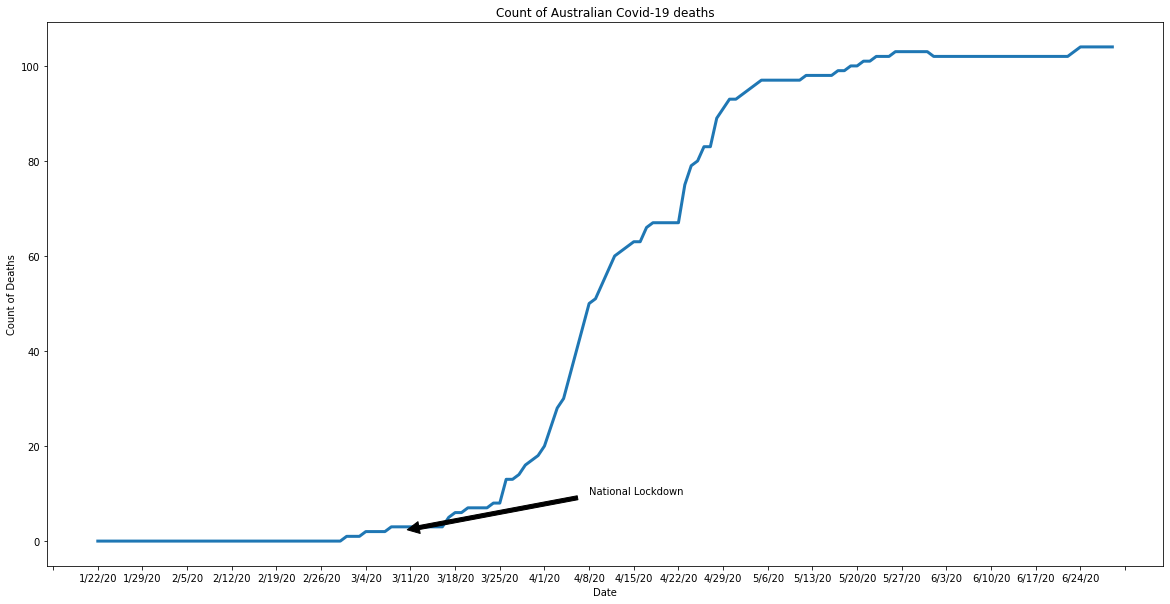

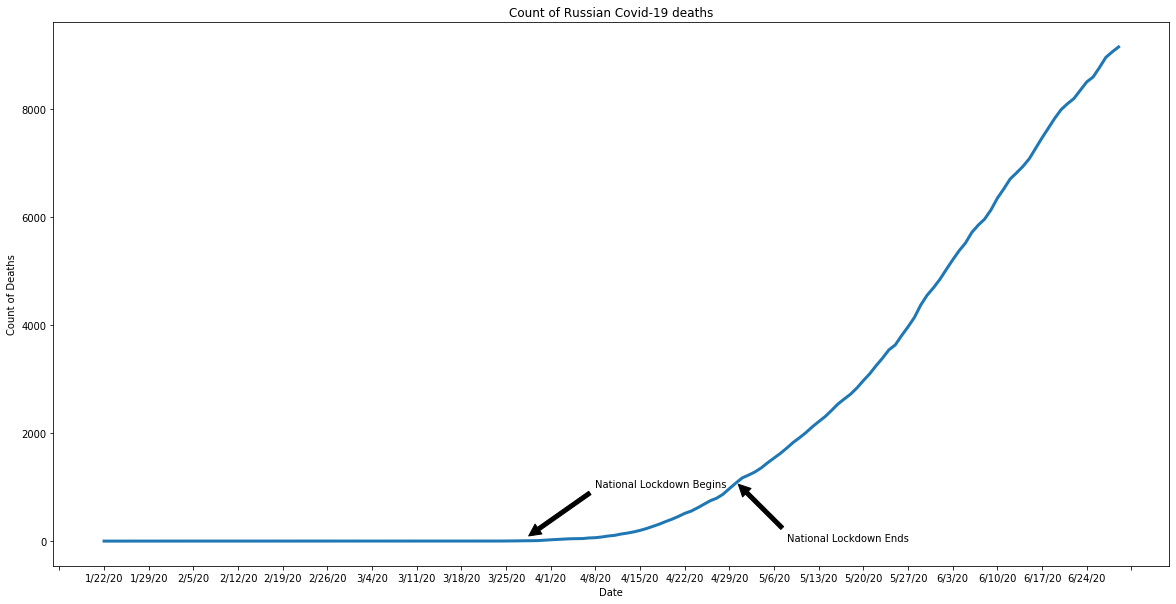

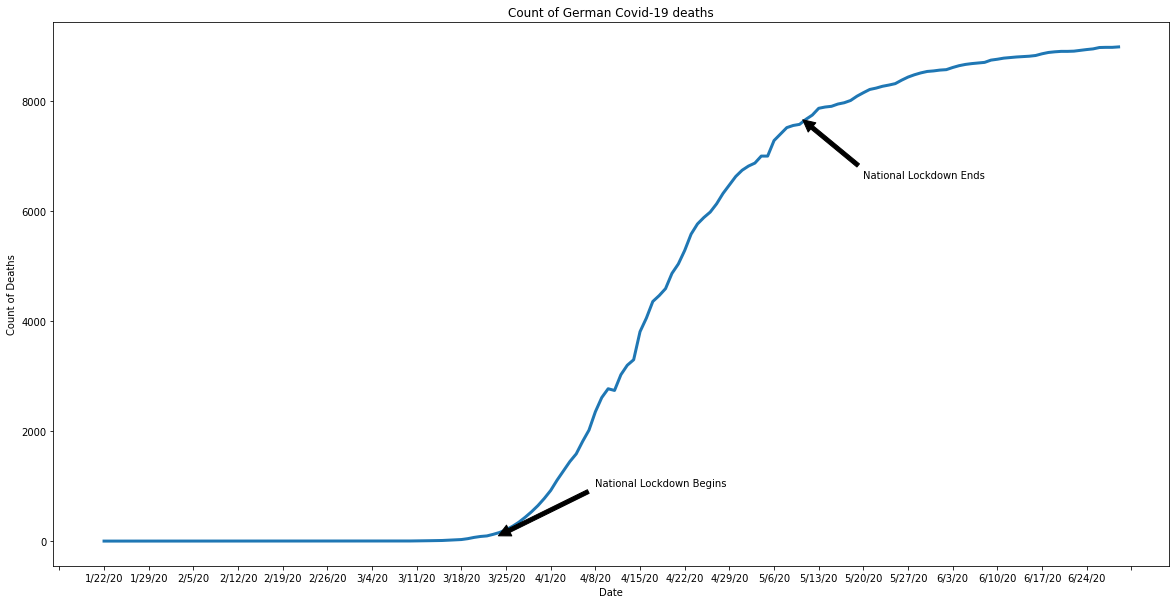

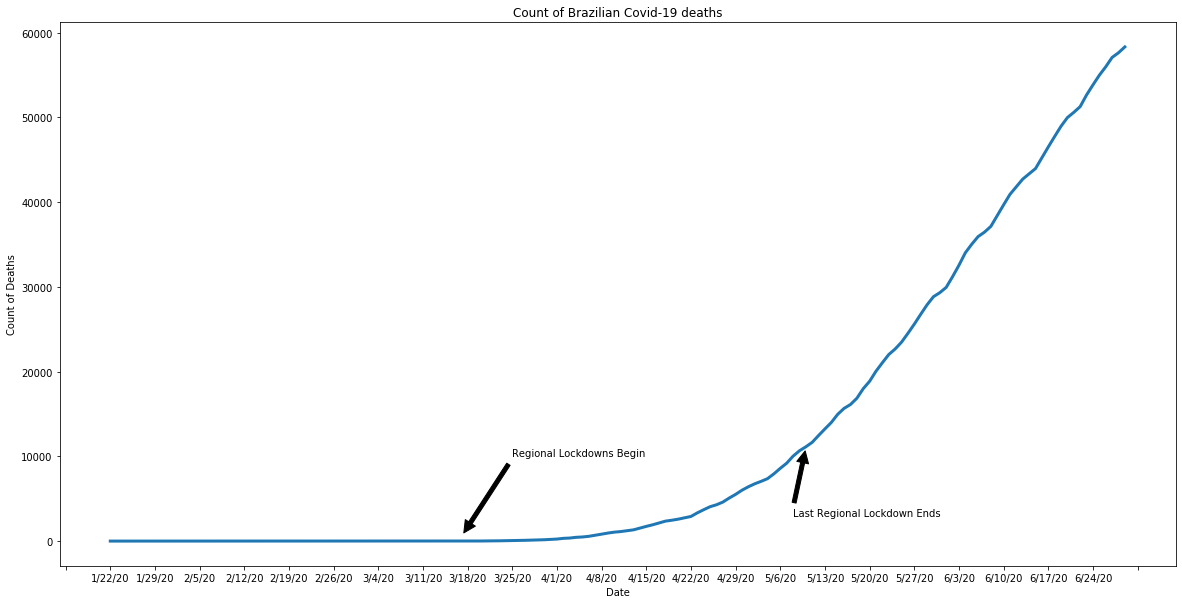

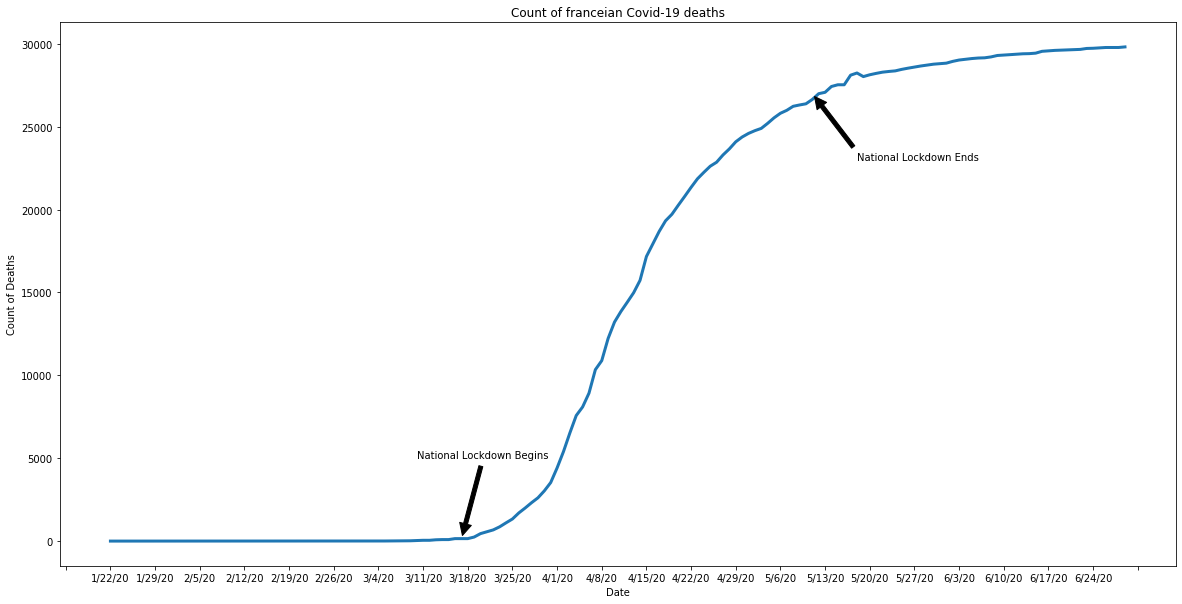

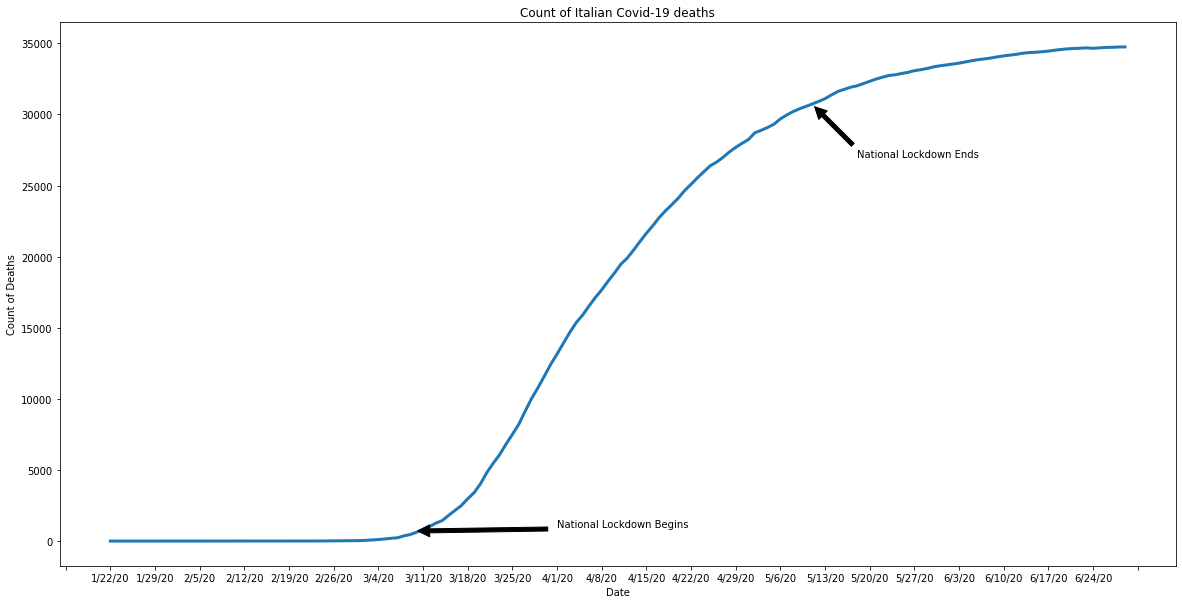

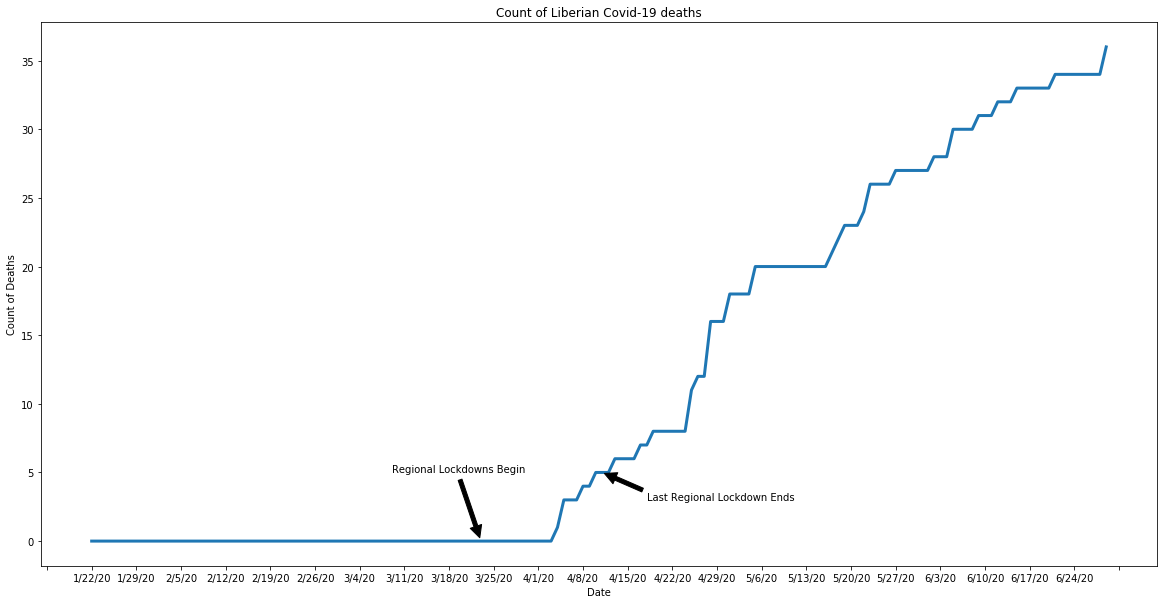

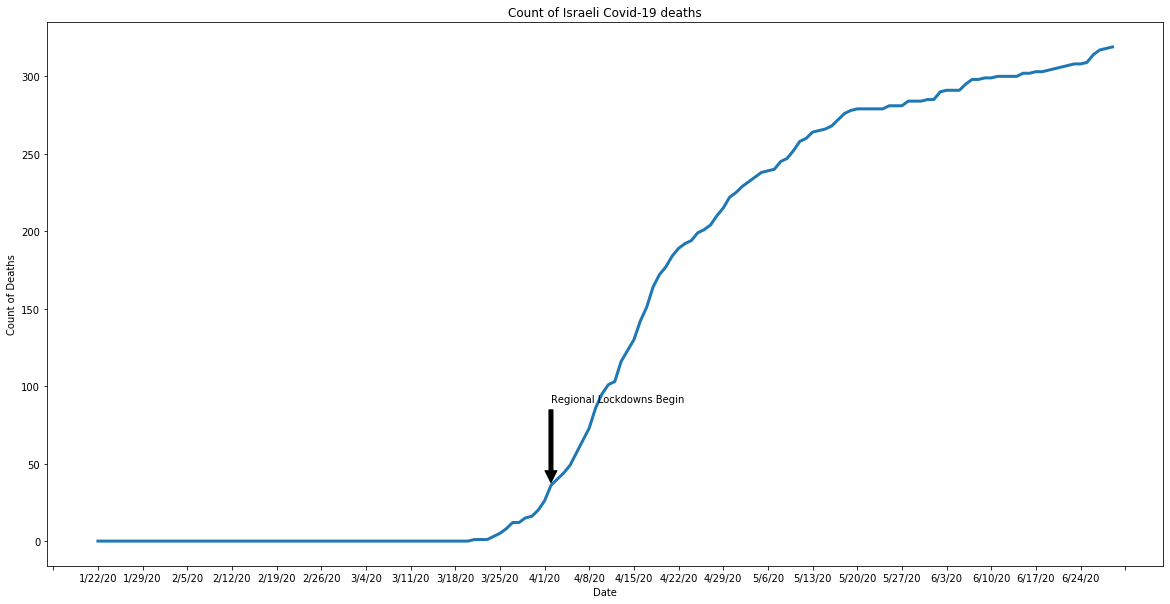

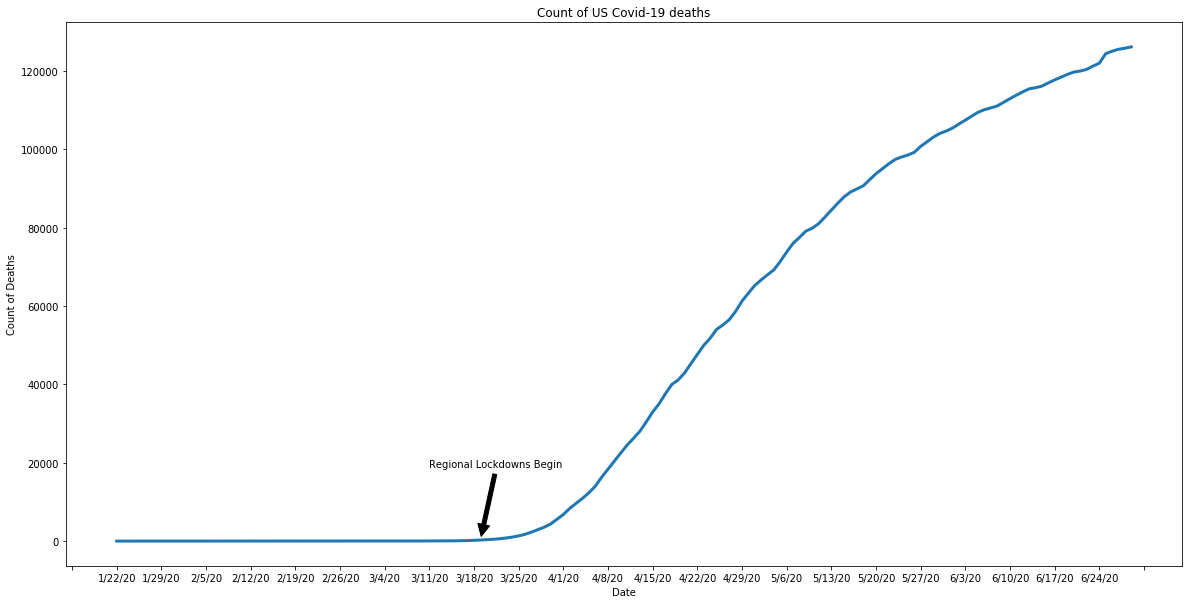

In [260]:
#Do the same as above, but for the deaths timeseries with the goal of plotting each seperately to understand if lockdown
#had and viible impact to spread or death.
#AUSTRALIA

australia_deaths_df=timeseries_deaths_df.loc[timeseries_deaths_df['Country/Region']=='Australia']
australia_deaths_daily_sums = australia_deaths_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
australia_deaths_daily_sums_df =  pd.DataFrame(australia_deaths_daily_sums)
australia_deaths_daily_sums_df_reindex = australia_deaths_daily_sums_df.reset_index()
australia_deaths_daily_sums_df_reindex.columns = ['Date', 'Count']
#australia_deaths_daily_sums_df_reindex.head(50)

#Plot out our deaths.  Rinse and repeat for each example country.  
plt.figure(figsize=(20,10))
ax9=plt.axes()
x_axis_australia_deaths = australia_deaths_daily_sums_df_reindex['Date']
y_axis_australia_deaths = australia_deaths_daily_sums_df_reindex['Count']
plt.title('Count of Australian Covid-19 deaths')
plt.plot(x_axis_australia_deaths, y_axis_australia_deaths, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Deaths')
ax9.xaxis.set_major_locator(MultipleLocator(7))
ax9.annotate('National Lockdown', xy=('3/9/20', 2), xytext=('4/8/20',10), arrowprops=dict(facecolor='black', shrink=0.05))

#RUSSIA

russia_deaths_df=timeseries_deaths_df.loc[timeseries_deaths_df['Country/Region']=='Russia']
russia_deaths_daily_sums = russia_deaths_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
russia_deaths_daily_sums_df =  pd.DataFrame(russia_deaths_daily_sums)
russia_deaths_daily_sums_df_reindex = russia_deaths_daily_sums_df.reset_index()
russia_deaths_daily_sums_df_reindex.columns = ['Date', 'Count']


plt.figure(figsize=(20,10))
ax10=plt.axes()
x_axis_russia_deaths = russia_deaths_daily_sums_df_reindex['Date']
y_axis_russia_deaths = russia_deaths_daily_sums_df_reindex['Count']
plt.title('Count of Russian Covid-19 deaths')
plt.plot(x_axis_russia_deaths, y_axis_russia_deaths, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Deaths')
ax10.xaxis.set_major_locator(MultipleLocator(7))
ax10.annotate('National Lockdown Begins', xy=('3/28/20', 50), xytext=('4/8/20',1000), arrowprops=dict(facecolor='black', shrink=0.05))
ax10.annotate('National Lockdown Ends', xy=('4/30/20', 1100), xytext=('5/8/20',10), arrowprops=dict(facecolor='black', shrink=0.05))


#GERMANY

germany_deaths_df=timeseries_deaths_df.loc[timeseries_deaths_df['Country/Region']=='Germany']
germany_deaths_daily_sums = germany_deaths_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
germany_deaths_daily_sums_df =  pd.DataFrame(germany_deaths_daily_sums)
germany_deaths_daily_sums_df_reindex = germany_deaths_daily_sums_df.reset_index()
germany_deaths_daily_sums_df_reindex.columns = ['Date', 'Count']


plt.figure(figsize=(20,10))
ax11=plt.axes()
x_axis_germany_deaths = germany_deaths_daily_sums_df_reindex['Date']
y_axis_germany_deaths = germany_deaths_daily_sums_df_reindex['Count']
plt.title('Count of German Covid-19 deaths')
plt.plot(x_axis_germany_deaths, y_axis_germany_deaths, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Deaths')
ax11.xaxis.set_major_locator(MultipleLocator(7))
ax11.annotate('National Lockdown Begins', xy=('3/23/20', 50), xytext=('4/8/20',1000), arrowprops=dict(facecolor='black', shrink=0.05))
ax11.annotate('National Lockdown Ends', xy=('5/10/20', 7700), xytext=('5/20/20',6600), arrowprops=dict(facecolor='black', shrink=0.05))

#BRAZIL

brazil_deaths_df=timeseries_deaths_df.loc[timeseries_deaths_df['Country/Region']=='Brazil']
brazil_deaths_daily_sums = brazil_deaths_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
brazil_deaths_daily_sums_df =  pd.DataFrame(brazil_deaths_daily_sums)
brazil_deaths_daily_sums_df_reindex = brazil_deaths_daily_sums_df.reset_index()
brazil_deaths_daily_sums_df_reindex.columns = ['Date', 'Count']


plt.figure(figsize=(20,10))
ax11=plt.axes()
x_axis_brazil_deaths = brazil_deaths_daily_sums_df_reindex['Date']
y_axis_brazil_deaths = brazil_deaths_daily_sums_df_reindex['Count']
plt.title('Count of Brazilian Covid-19 deaths')
plt.plot(x_axis_brazil_deaths, y_axis_brazil_deaths, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Deaths')
ax11.xaxis.set_major_locator(MultipleLocator(7))
ax11.annotate('Regional Lockdowns Begin', xy=('3/17/20', 500), xytext=('3/25/20',10000), arrowprops=dict(facecolor='black', shrink=0.05))
ax11.annotate('Last Regional Lockdown Ends', xy=('5/10/20', 11000), xytext=('5/8/20',3000), arrowprops=dict(facecolor='black', shrink=0.05))

#FRANCE 

france_deaths_df=timeseries_deaths_df.loc[timeseries_deaths_df['Country/Region']=='France']
france_deaths_daily_sums = france_deaths_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
france_deaths_daily_sums_df =  pd.DataFrame(france_deaths_daily_sums)
france_deaths_daily_sums_df_reindex = france_deaths_daily_sums_df.reset_index()
france_deaths_daily_sums_df_reindex.columns = ['Date', 'Count']


plt.figure(figsize=(20,10))
ax12=plt.axes()
x_axis_france_deaths = france_deaths_daily_sums_df_reindex['Date']
y_axis_france_deaths = france_deaths_daily_sums_df_reindex['Count']
plt.title('Count of franceian Covid-19 deaths')
plt.plot(x_axis_france_deaths, y_axis_france_deaths, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Deaths')
ax12.xaxis.set_major_locator(MultipleLocator(7))
ax12.annotate('National Lockdown Begins', xy=('3/17/20', 100), xytext=('3/10/20',5000), arrowprops=dict(facecolor='black', shrink=0.05))
ax12.annotate('National Lockdown Ends', xy=('5/11/20', 27000), xytext=('5/18/20',23000), arrowprops=dict(facecolor='black', shrink=0.05))


#ITALY
italy_deaths_df=timeseries_deaths_df.loc[timeseries_deaths_df['Country/Region']=='Italy']
italy_deaths_daily_sums = italy_deaths_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
italy_deaths_daily_sums_df =  pd.DataFrame(italy_deaths_daily_sums)
italy_deaths_daily_sums_df_reindex = italy_deaths_daily_sums_df.reset_index()
italy_deaths_daily_sums_df_reindex.columns = ['Date', 'Count']


plt.figure(figsize=(20,10))
ax13=plt.axes()
x_axis_italy_deaths = italy_deaths_daily_sums_df_reindex['Date']
y_axis_italy_deaths = italy_deaths_daily_sums_df_reindex['Count']
plt.title('Count of Italian Covid-19 deaths')
plt.plot(x_axis_italy_deaths, y_axis_italy_deaths, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Deaths')
ax13.xaxis.set_major_locator(MultipleLocator(7))
ax13.annotate('National Lockdown Begins', xy=('3/9/20', 700), xytext=('4/1/20',1000), arrowprops=dict(facecolor='black', shrink=0.05))
ax13.annotate('National Lockdown Ends', xy=('5/11/20', 30700), xytext=('5/18/20',27000), arrowprops=dict(facecolor='black', shrink=0.05))


#LIBERIA
liberia_deaths_df=timeseries_deaths_df.loc[timeseries_deaths_df['Country/Region']=='Liberia']
liberia_deaths_daily_sums = liberia_deaths_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
liberia_deaths_daily_sums_df =  pd.DataFrame(liberia_deaths_daily_sums)
liberia_deaths_daily_sums_df_reindex = liberia_deaths_daily_sums_df.reset_index()
liberia_deaths_daily_sums_df_reindex.columns = ['Date', 'Count']


plt.figure(figsize=(20,10))
ax14=plt.axes()
x_axis_liberia_deaths = liberia_deaths_daily_sums_df_reindex['Date']
y_axis_liberia_deaths = liberia_deaths_daily_sums_df_reindex['Count']
plt.title('Count of Liberian Covid-19 deaths')
plt.plot(x_axis_liberia_deaths, y_axis_liberia_deaths, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Deaths')
ax14.xaxis.set_major_locator(MultipleLocator(7))
ax14.annotate('Regional Lockdowns Begin', xy=('3/23/20', 0), xytext=('3/9/20',5), arrowprops=dict(facecolor='black', shrink=0.05))
ax14.annotate('Last Regional Lockdown Ends', xy=('4/11/20', 5), xytext=('4/18/20',3), arrowprops=dict(facecolor='black', shrink=0.05))


#ISRAEL

israel_deaths_df=timeseries_deaths_df.loc[timeseries_deaths_df['Country/Region']=='Israel']
israel_deaths_daily_sums = israel_deaths_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
israel_deaths_daily_sums_df =  pd.DataFrame(israel_deaths_daily_sums)
israel_deaths_daily_sums_df_reindex = israel_deaths_daily_sums_df.reset_index()
israel_deaths_daily_sums_df_reindex.columns = ['Date', 'Count']


plt.figure(figsize=(20,10))
ax15=plt.axes()
x_axis_israel_deaths = israel_deaths_daily_sums_df_reindex['Date']
y_axis_israel_deaths = israel_deaths_daily_sums_df_reindex['Count']
plt.title('Count of Israeli Covid-19 deaths')
plt.plot(x_axis_israel_deaths, y_axis_israel_deaths, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Deaths')
ax15.xaxis.set_major_locator(MultipleLocator(7))
ax15.annotate('Regional Lockdowns Begin', xy=('4/2/20', 35), xytext=('4/2/20',90), arrowprops=dict(facecolor='black', shrink=0.05))

#UNITED STATES

us_deaths_df=timeseries_deaths_df.loc[timeseries_deaths_df['Country/Region']=='US']
us_deaths_daily_sums = us_deaths_df.drop(columns=['Province/State','Country/Region','Lat','Long']).sum(axis=0)
us_deaths_daily_sums_df =  pd.DataFrame(us_deaths_daily_sums)
us_deaths_daily_sums_df_reindex = us_deaths_daily_sums_df.reset_index()
us_deaths_daily_sums_df_reindex.columns = ['Date', 'Count']


plt.figure(figsize=(20,10))
ax16=plt.axes()
x_axis_us_deaths = us_deaths_daily_sums_df_reindex['Date']
y_axis_us_deaths = us_deaths_daily_sums_df_reindex['Count']
plt.title('Count of US Covid-19 deaths')
plt.plot(x_axis_us_deaths, y_axis_us_deaths, linewidth=3)
plt.xlabel('Date'), 
plt.ylabel('Count of Deaths')
ax16.xaxis.set_major_locator(MultipleLocator(7))
ax16.annotate('Regional Lockdowns Begin', xy=('3/19/20', 300), xytext=('3/11/20',19000), arrowprops=dict(facecolor='black', shrink=0.05))


In [34]:
#